In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

from tqdm import tqdm
from scipy.io import loadmat

import torchvision.transforms as T

from sklearn.preprocessing import MinMaxScaler

In [3]:
# use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# Load HR patches

In [4]:
# hr_patches_file_path = "D:\\Hemanth\\Dataset\\IP_hr_patches.mat"
# hr_patches_data = loadmat(hr_patches_file_path)

# num_patches = 1201

# hr_patches_list = [hr_patches_data[f'hr_patch_{i}'] for i in range(1, num_patches)]

# hr_patches_array = np.array(hr_patches_list, dtype=np.float32)

# reshaped_array = hr_patches_array.reshape(-1, hr_patches_array.shape[-1])

# scaler = MinMaxScaler()
# normalized_array = scaler.fit_transform(reshaped_array)

# normalized_hr_patches_array = normalized_array.reshape(hr_patches_array.shape)

# hr_patches_tensor = torch.tensor(normalized_hr_patches_array).to(device)

# print("Shape of High-Resolution Patches Tensor:", hr_patches_tensor.shape)
# print(hr_patches_tensor.min(), hr_patches_tensor.max())

Shape of High-Resolution Patches Tensor: torch.Size([1200, 66, 66, 200])
tensor(0., device='cuda:0') tensor(1.0000, device='cuda:0')


In [5]:
# hr_patches_tensor = hr_patches_tensor.unsqueeze(4)
# hr_patches_tensor = hr_patches_tensor.permute(0, 3, 1, 2, 4)
# hr_patches_tensor.shape

torch.Size([1200, 200, 66, 66, 1])

In [13]:
hr_patches_file_path = "D:\\Hemanth\\Dataset\\IP_hr_patches.mat"
hr_patches_data = loadmat(hr_patches_file_path)

num_patches = 1601

hr_patches_list = [hr_patches_data[f'hr_patch_{i}'] for i in range(1, num_patches)]

hr_patches_array = np.array(hr_patches_list, dtype=np.float32)

reshaped_array = hr_patches_array.reshape(-1, hr_patches_array.shape[-1])

# Normalize the patches
scaler = MinMaxScaler()
normalized_array = scaler.fit_transform(reshaped_array)

total_array = normalized_array.reshape(hr_patches_array.shape)

normalized_hr_patches_array = total_array[:1200]

hr_patches_tensor = torch.tensor(normalized_hr_patches_array).to(device)

print("Shape of High-Resolution Patches Tensor:", hr_patches_tensor.shape)
print(hr_patches_tensor.min(), hr_patches_tensor.max())

Shape of High-Resolution Patches Tensor: torch.Size([1200, 66, 66, 200])
tensor(0., device='cuda:0') tensor(1.0000, device='cuda:0')


In [14]:
normalized_test_hr_array = total_array[1200:]

test_hr_patches_tensor = torch.tensor(normalized_test_hr_array).to(device)

print("Shape of High-Resolution Patches Tensor:", test_hr_patches_tensor.shape)
print(test_hr_patches_tensor.min(), test_hr_patches_tensor.max())

Shape of High-Resolution Patches Tensor: torch.Size([400, 66, 66, 200])
tensor(0., device='cuda:0') tensor(1.0000, device='cuda:0')


In [15]:
hr_patches_tensor = hr_patches_tensor.unsqueeze(4)
hr_patches_tensor = hr_patches_tensor.permute(0, 3, 1, 2, 4)
hr_patches_tensor.shape

torch.Size([1200, 200, 66, 66, 1])

In [16]:
test_hr_patches_tensor = test_hr_patches_tensor.unsqueeze(4)
test_hr_patches_tensor = test_hr_patches_tensor.permute(0, 3, 1, 2, 4)
test_hr_patches_tensor.shape

torch.Size([400, 200, 66, 66, 1])

# Load Bilinear LR patches

In [ ]:
# from scipy.ndimage import zoom

# bilinear_lr_patches_file_path = "D:\\Hemanth\\Dataset\\IP_lr_patches_bilinear.mat"
# bilinear_lr_patches_data = loadmat(bilinear_lr_patches_file_path)

# bilinear_lr_patches_list = [bilinear_lr_patches_data[f'lr_patch_{i}'] for i in range(1, num_patches)]

# # Upsample the patches using bilinear interpolation with a scale factor of 3x
# upsampled_lr_patches_array = np.array([zoom(patch, zoom=(3,3,1), order=3) for patch in bilinear_lr_patches_list], dtype=np.float32)

# # Reshape the upsampled array
# reshaped_upsampled_lr_array = upsampled_lr_patches_array.reshape(-1, upsampled_lr_patches_array.shape[-1])

# # Normalize the patches
# normalized_lr_array = scaler.fit_transform(reshaped_upsampled_lr_array)

# # Reshape the normalized array back to patch form
# normalized_lr_patches_array = normalized_lr_array.reshape((num_patches-1, 66, 66, 200))

# # Convert the normalized patches to a tensor
# bilinear_lr_patches_tensor = torch.tensor(normalized_lr_patches_array).to(device)

# # Print the shape of the tensor and min/max values
# print("Shape of Low-Resolution Patches Tensor:", bilinear_lr_patches_tensor.shape)
# print("Min value:", bilinear_lr_patches_tensor.min().item())
# print("Max value:", bilinear_lr_patches_tensor.max().item())


In [ ]:
# bilinear_lr_patches_tensor = bilinear_lr_patches_tensor.unsqueeze(4)
# bilinear_lr_patches_tensor = bilinear_lr_patches_tensor.permute(0, 3, 1, 2, 4)
# bilinear_lr_patches_tensor.shape

In [17]:
from scipy.ndimage import zoom

bilinear_lr_patches_file_path = "D:\\Hemanth\\Dataset\\IP_lr_patches_bilinear.mat"
bilinear_lr_patches_data = loadmat(bilinear_lr_patches_file_path)

num_patches = 1601

bilinear_lr_patches_list = [bilinear_lr_patches_data[f'lr_patch_{i}'] for i in range(1, num_patches)]

upsampled_lr_patches_array = np.array([zoom(patch, zoom=(3,3,1), order=3) for patch in bilinear_lr_patches_list], dtype=np.float32)

reshaped_upsampled_lr_array = upsampled_lr_patches_array.reshape(-1, upsampled_lr_patches_array.shape[-1])

normalized_lr_array = scaler.fit_transform(reshaped_upsampled_lr_array)

total_lr_array = normalized_lr_array.reshape((num_patches-1, 66, 66, 200))

normalized_lr_patches_array = total_lr_array[:1200]

bilinear_lr_patches_tensor = torch.tensor(normalized_lr_patches_array).to(device)

print("Shape of High-Resolution Patches Tensor:", bilinear_lr_patches_tensor.shape)
print(bilinear_lr_patches_tensor.min(), bilinear_lr_patches_tensor.max())

Shape of High-Resolution Patches Tensor: torch.Size([1200, 66, 66, 200])
tensor(0., device='cuda:0') tensor(1.0000, device='cuda:0')


In [18]:
normalized_test_lr_array = total_lr_array[1200:]

test_bilinear_lr_patches_tensor = torch.tensor(normalized_test_lr_array).to(device)

print("Shape of High-Resolution Patches Tensor:", test_bilinear_lr_patches_tensor.shape)
print(test_bilinear_lr_patches_tensor.min(), test_bilinear_lr_patches_tensor.max())

Shape of High-Resolution Patches Tensor: torch.Size([400, 66, 66, 200])
tensor(0., device='cuda:0') tensor(1., device='cuda:0')


In [19]:
bilinear_lr_patches_tensor = bilinear_lr_patches_tensor.unsqueeze(4)
bilinear_lr_patches_tensor = bilinear_lr_patches_tensor.permute(0, 3, 1, 2, 4)
bilinear_lr_patches_tensor.shape

torch.Size([1200, 200, 66, 66, 1])

In [20]:
test_bilinear_lr_patches_tensor = test_bilinear_lr_patches_tensor.unsqueeze(4)
test_bilinear_lr_patches_tensor = test_bilinear_lr_patches_tensor.permute(0, 3, 1, 2, 4)
test_bilinear_lr_patches_tensor.shape

torch.Size([400, 200, 66, 66, 1])

# PARAMETERS

In [33]:
num_channels = hr_patches_tensor.shape[1]
hr_dimensions = hr_patches_tensor.shape[2]
lr_dimensions = bilinear_lr_patches_tensor.shape[2]
batch_size = 30

print(num_channels, hr_dimensions, lr_dimensions)

200 66 66


# DATALOADER

In [ ]:
# hr_data_loader = DataLoader(dataset = hr_patches_tensor,
#                          batch_size = batch_size,
#                          shuffle = False
#                          )

# lr_data_loader = DataLoader(dataset = bilinear_lr_patches_tensor,
#                          batch_size = batch_size,
#                          shuffle = False
#                          )

In [35]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, hr_data, lr_data):
        self.hr_data = hr_data
        self.lr_data = lr_data

    def __len__(self):
        return len(self.hr_data)

    def __getitem__(self, idx):
        hr_sample = self.hr_data[idx]
        lr_sample = self.lr_data[idx]
        return hr_sample, lr_sample


In [36]:
custom_dataset = CustomDataset(hr_patches_tensor, bilinear_lr_patches_tensor)
data_loader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)

# Structure the model

In [24]:
class Autoencoder3D(nn.Module):
    def __init__(self):
        super(Autoencoder3D, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv3d(num_channels, 512, (3,3,1), 1, (1,1,0)),
            nn.ReLU(),
            nn.Conv3d(512, 256, (3,3,1), 1, (1,1,0)),
            nn.ReLU(),
            nn.Conv3d(256, 128,  (3,3,1), 1, (1,1,0)),
            nn.ReLU(),
            nn.Conv3d(128, 64,  (3,3,1), 1, (1,1,0)),
            nn.ReLU()
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose3d(64 , 128, (3,3,1), 1, (1,1,0)),
            nn.ReLU(),
            nn.ConvTranspose3d(128 , 256, (3,3,1), 1, (1,1,0)),
            nn.ReLU(),
            nn.ConvTranspose3d(256 , 512, (3,3,1), 1, (1,1,0)),
            nn.ReLU(),
            nn.ConvTranspose3d(512 ,num_channels, (3,3,1), 1, (1,1,0)),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

encoder = Autoencoder3D().to(device)
print(encoder)

Autoencoder3D(
  (encoder): Sequential(
    (0): Conv3d(200, 512, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (1): ReLU()
    (2): Conv3d(512, 256, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (3): ReLU()
    (4): Conv3d(256, 128, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (5): ReLU()
    (6): Conv3d(128, 64, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (7): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose3d(64, 128, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (1): ReLU()
    (2): ConvTranspose3d(128, 256, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (3): ReLU()
    (4): ConvTranspose3d(256, 512, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (5): ReLU()
    (6): ConvTranspose3d(512, 200, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (7): Sigmoid()
  )
)


In [8]:
# import torch
# import torch.nn as nn

# class Autoencoder3D(nn.Module):
#     def __init__(self, patch_size, num_channels):
#         super(Autoencoder3D, self).__init__()

#         # Encoder
#         self.encoder = nn.Sequential(
#             nn.Conv3d(num_channels, 128, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Conv3d(128, 64, kernel_size=3, padding=1),
#             nn.ReLU()
#         )

#         # Latent layer
#         # self.latent = nn.Conv3d(256, 32, kernel_size=3, padding=1)

#         # Decoder
#         self.decoder = nn.Sequential(
#             nn.ConvTranspose3d(64, 128, kernel_size=3, padding=1),  
#             nn.ReLU(),
#             nn.ConvTranspose3d(128, num_channels, kernel_size=3, padding=1),
#             nn.Sigmoid()
#         )

#     def forward(self, x):
#         x = self.encoder(x)
#         # x = self.latent(x)
#         x = self.decoder(x)
#         return x


# Training

In [25]:
def rmse_loss(input, target):
    return torch.sqrt(F.mse_loss(input, target))

def sam_loss(input, target):
    input_norm = F.normalize(input.reshape(input.size(0), -1), dim=1)
    target_norm = F.normalize(target.reshape(target.size(0), -1), dim=1)
    return torch.acos((input_norm * target_norm).sum(dim=1)).mean()

In [37]:
optimizer = optim.Adam(encoder.parameters(), lr = 0.00001)

In [38]:
num_epochs = 150

losses = []

lambda_rmse = 0.9
lambda_sam = 0.4

for epoch in range(num_epochs):
    # for hr_batch, lr_batch in tqdm(zip(hr_data_loader, lr_data_loader), total=len(hr_data_loader)):
    for hr_batch, lr_batch in tqdm(data_loader, total=len(data_loader)):
        hr_batch = hr_batch.to(device)
        lr_batch = lr_batch.to(device)

        optimizer.zero_grad()

        sr_batch = encoder(lr_batch)

        rmse_loss_value = rmse_loss(sr_batch, hr_batch)
        sam_loss_value = sam_loss(sr_batch, hr_batch)

        loss = lambda_rmse*rmse_loss_value + lambda_sam*sam_loss_value

        loss.backward()
        optimizer.step()

    losses.append(loss.item())
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}")


100%|██████████| 40/40 [00:05<00:00,  7.05it/s]


Epoch [1/150], Loss: 0.1213509738445282


100%|██████████| 40/40 [00:04<00:00,  8.42it/s]


Epoch [2/150], Loss: 0.12452326714992523


100%|██████████| 40/40 [00:04<00:00,  8.36it/s]


Epoch [3/150], Loss: 0.11869528889656067


100%|██████████| 40/40 [00:04<00:00,  8.36it/s]


Epoch [4/150], Loss: 0.11661259084939957


100%|██████████| 40/40 [00:04<00:00,  8.33it/s]


Epoch [5/150], Loss: 0.1169961467385292


100%|██████████| 40/40 [00:04<00:00,  8.25it/s]


Epoch [6/150], Loss: 0.11130895465612411


100%|██████████| 40/40 [00:04<00:00,  8.25it/s]


Epoch [7/150], Loss: 0.11024072021245956


100%|██████████| 40/40 [00:04<00:00,  8.25it/s]


Epoch [8/150], Loss: 0.10816545784473419


100%|██████████| 40/40 [00:04<00:00,  8.25it/s]


Epoch [9/150], Loss: 0.10512064397335052


100%|██████████| 40/40 [00:04<00:00,  8.22it/s]


Epoch [10/150], Loss: 0.10425086319446564


100%|██████████| 40/40 [00:04<00:00,  8.25it/s]


Epoch [11/150], Loss: 0.10606531798839569


100%|██████████| 40/40 [00:04<00:00,  8.22it/s]


Epoch [12/150], Loss: 0.10529182851314545


100%|██████████| 40/40 [00:04<00:00,  8.36it/s]


Epoch [13/150], Loss: 0.10263566672801971


100%|██████████| 40/40 [00:04<00:00,  8.42it/s]


Epoch [14/150], Loss: 0.10524545609951019


100%|██████████| 40/40 [00:04<00:00,  8.29it/s]


Epoch [15/150], Loss: 0.10375935584306717


100%|██████████| 40/40 [00:04<00:00,  8.39it/s]


Epoch [16/150], Loss: 0.10311022400856018


100%|██████████| 40/40 [00:04<00:00,  8.37it/s]


Epoch [17/150], Loss: 0.10256943851709366


100%|██████████| 40/40 [00:04<00:00,  8.36it/s]


Epoch [18/150], Loss: 0.10070914030075073


100%|██████████| 40/40 [00:04<00:00,  8.46it/s]


Epoch [19/150], Loss: 0.10020899772644043


100%|██████████| 40/40 [00:04<00:00,  8.43it/s]


Epoch [20/150], Loss: 0.10091083496809006


100%|██████████| 40/40 [00:04<00:00,  8.22it/s]


Epoch [21/150], Loss: 0.1001318097114563


100%|██████████| 40/40 [00:04<00:00,  8.41it/s]


Epoch [22/150], Loss: 0.09833918511867523


100%|██████████| 40/40 [00:04<00:00,  8.45it/s]


Epoch [23/150], Loss: 0.0999348908662796


100%|██████████| 40/40 [00:04<00:00,  8.35it/s]


Epoch [24/150], Loss: 0.10086697340011597


100%|██████████| 40/40 [00:04<00:00,  8.42it/s]


Epoch [25/150], Loss: 0.10001533478498459


100%|██████████| 40/40 [00:04<00:00,  8.43it/s]


Epoch [26/150], Loss: 0.09632433950901031


100%|██████████| 40/40 [00:04<00:00,  8.39it/s]


Epoch [27/150], Loss: 0.10031243413686752


100%|██████████| 40/40 [00:04<00:00,  8.44it/s]


Epoch [28/150], Loss: 0.09837295114994049


100%|██████████| 40/40 [00:04<00:00,  8.36it/s]


Epoch [29/150], Loss: 0.09665432572364807


100%|██████████| 40/40 [00:04<00:00,  8.42it/s]


Epoch [30/150], Loss: 0.09967418015003204


100%|██████████| 40/40 [00:04<00:00,  8.39it/s]


Epoch [31/150], Loss: 0.09691896289587021


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [32/150], Loss: 0.09907674789428711


100%|██████████| 40/40 [00:04<00:00,  8.41it/s]


Epoch [33/150], Loss: 0.09793907403945923


100%|██████████| 40/40 [00:04<00:00,  8.36it/s]


Epoch [34/150], Loss: 0.09727557748556137


100%|██████████| 40/40 [00:04<00:00,  8.45it/s]


Epoch [35/150], Loss: 0.09808389842510223


100%|██████████| 40/40 [00:04<00:00,  8.42it/s]


Epoch [36/150], Loss: 0.0940144956111908


100%|██████████| 40/40 [00:04<00:00,  8.42it/s]


Epoch [37/150], Loss: 0.09606426954269409


100%|██████████| 40/40 [00:04<00:00,  8.45it/s]


Epoch [38/150], Loss: 0.09471506625413895


100%|██████████| 40/40 [00:04<00:00,  8.45it/s]


Epoch [39/150], Loss: 0.09490226209163666


100%|██████████| 40/40 [00:04<00:00,  8.42it/s]


Epoch [40/150], Loss: 0.09490758180618286


100%|██████████| 40/40 [00:04<00:00,  8.42it/s]


Epoch [41/150], Loss: 0.09656652808189392


100%|██████████| 40/40 [00:04<00:00,  8.45it/s]


Epoch [42/150], Loss: 0.09659279882907867


100%|██████████| 40/40 [00:04<00:00,  8.44it/s]


Epoch [43/150], Loss: 0.09555938839912415


100%|██████████| 40/40 [00:04<00:00,  8.38it/s]


Epoch [44/150], Loss: 0.09559859335422516


100%|██████████| 40/40 [00:04<00:00,  8.30it/s]


Epoch [45/150], Loss: 0.09430981427431107


100%|██████████| 40/40 [00:04<00:00,  8.36it/s]


Epoch [46/150], Loss: 0.09513776004314423


100%|██████████| 40/40 [00:04<00:00,  8.18it/s]


Epoch [47/150], Loss: 0.0960778146982193


100%|██████████| 40/40 [00:04<00:00,  8.19it/s]


Epoch [48/150], Loss: 0.09557487070560455


100%|██████████| 40/40 [00:04<00:00,  8.22it/s]


Epoch [49/150], Loss: 0.09717792272567749


100%|██████████| 40/40 [00:04<00:00,  8.19it/s]


Epoch [50/150], Loss: 0.09658828377723694


100%|██████████| 40/40 [00:04<00:00,  8.16it/s]


Epoch [51/150], Loss: 0.09388862550258636


100%|██████████| 40/40 [00:04<00:00,  8.19it/s]


Epoch [52/150], Loss: 0.09410515427589417


100%|██████████| 40/40 [00:04<00:00,  8.19it/s]


Epoch [53/150], Loss: 0.0934162363409996


100%|██████████| 40/40 [00:04<00:00,  8.19it/s]


Epoch [54/150], Loss: 0.09318561851978302


100%|██████████| 40/40 [00:04<00:00,  8.19it/s]


Epoch [55/150], Loss: 0.09346670657396317


100%|██████████| 40/40 [00:04<00:00,  8.21it/s]


Epoch [56/150], Loss: 0.09558375924825668


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [57/150], Loss: 0.09336009621620178


100%|██████████| 40/40 [00:04<00:00,  8.34it/s]


Epoch [58/150], Loss: 0.09417785704135895


100%|██████████| 40/40 [00:04<00:00,  8.21it/s]


Epoch [59/150], Loss: 0.09300635010004044


100%|██████████| 40/40 [00:04<00:00,  8.30it/s]


Epoch [60/150], Loss: 0.09417323768138885


100%|██████████| 40/40 [00:04<00:00,  8.31it/s]


Epoch [61/150], Loss: 0.09247585386037827


100%|██████████| 40/40 [00:04<00:00,  8.31it/s]


Epoch [62/150], Loss: 0.09249468147754669


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [63/150], Loss: 0.09423616528511047


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [64/150], Loss: 0.09187051653862


100%|██████████| 40/40 [00:04<00:00,  8.31it/s]


Epoch [65/150], Loss: 0.09290122240781784


100%|██████████| 40/40 [00:04<00:00,  8.30it/s]


Epoch [66/150], Loss: 0.09214219450950623


100%|██████████| 40/40 [00:04<00:00,  8.27it/s]


Epoch [67/150], Loss: 0.09162639826536179


100%|██████████| 40/40 [00:04<00:00,  8.30it/s]


Epoch [68/150], Loss: 0.09211017936468124


100%|██████████| 40/40 [00:04<00:00,  8.30it/s]


Epoch [69/150], Loss: 0.09143131971359253


100%|██████████| 40/40 [00:04<00:00,  8.31it/s]


Epoch [70/150], Loss: 0.0914214700460434


100%|██████████| 40/40 [00:04<00:00,  8.33it/s]


Epoch [71/150], Loss: 0.09133435785770416


100%|██████████| 40/40 [00:04<00:00,  8.30it/s]


Epoch [72/150], Loss: 0.09093162417411804


100%|██████████| 40/40 [00:04<00:00,  8.32it/s]


Epoch [73/150], Loss: 0.09057007730007172


100%|██████████| 40/40 [00:04<00:00,  8.32it/s]


Epoch [74/150], Loss: 0.09049874544143677


100%|██████████| 40/40 [00:04<00:00,  8.30it/s]


Epoch [75/150], Loss: 0.09267274290323257


100%|██████████| 40/40 [00:04<00:00,  8.30it/s]


Epoch [76/150], Loss: 0.09200479090213776


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [77/150], Loss: 0.0904233455657959


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [78/150], Loss: 0.09198202192783356


100%|██████████| 40/40 [00:04<00:00,  8.17it/s]


Epoch [79/150], Loss: 0.09080740064382553


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [80/150], Loss: 0.08931874483823776


100%|██████████| 40/40 [00:04<00:00,  8.25it/s]


Epoch [81/150], Loss: 0.09020747989416122


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [82/150], Loss: 0.09144675731658936


100%|██████████| 40/40 [00:04<00:00,  8.29it/s]


Epoch [83/150], Loss: 0.0915071964263916


100%|██████████| 40/40 [00:04<00:00,  8.31it/s]


Epoch [84/150], Loss: 0.089565709233284


100%|██████████| 40/40 [00:04<00:00,  8.30it/s]


Epoch [85/150], Loss: 0.08985497057437897


100%|██████████| 40/40 [00:04<00:00,  8.30it/s]


Epoch [86/150], Loss: 0.09138037264347076


100%|██████████| 40/40 [00:04<00:00,  8.30it/s]


Epoch [87/150], Loss: 0.09113222360610962


100%|██████████| 40/40 [00:04<00:00,  8.30it/s]


Epoch [88/150], Loss: 0.08882461488246918


100%|██████████| 40/40 [00:04<00:00,  8.27it/s]


Epoch [89/150], Loss: 0.0905705913901329


100%|██████████| 40/40 [00:04<00:00,  8.29it/s]


Epoch [90/150], Loss: 0.09029284119606018


100%|██████████| 40/40 [00:04<00:00,  8.29it/s]


Epoch [91/150], Loss: 0.08981262147426605


100%|██████████| 40/40 [00:04<00:00,  8.31it/s]


Epoch [92/150], Loss: 0.09035538136959076


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [93/150], Loss: 0.09032540023326874


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [94/150], Loss: 0.08926142752170563


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [95/150], Loss: 0.08914214372634888


100%|██████████| 40/40 [00:04<00:00,  8.30it/s]


Epoch [96/150], Loss: 0.08974041044712067


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [97/150], Loss: 0.09075130522251129


100%|██████████| 40/40 [00:04<00:00,  8.27it/s]


Epoch [98/150], Loss: 0.09095791727304459


100%|██████████| 40/40 [00:04<00:00,  8.29it/s]


Epoch [99/150], Loss: 0.08896609395742416


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [100/150], Loss: 0.08815433084964752


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [101/150], Loss: 0.0906980037689209


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [102/150], Loss: 0.08938439190387726


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [103/150], Loss: 0.090073361992836


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [104/150], Loss: 0.08830541372299194


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [105/150], Loss: 0.09010913968086243


100%|██████████| 40/40 [00:04<00:00,  8.25it/s]


Epoch [106/150], Loss: 0.08899199217557907


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [107/150], Loss: 0.08929117023944855


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [108/150], Loss: 0.08829374611377716


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [109/150], Loss: 0.08860025554895401


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [110/150], Loss: 0.08995968848466873


100%|██████████| 40/40 [00:04<00:00,  8.30it/s]


Epoch [111/150], Loss: 0.08896751701831818


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [112/150], Loss: 0.0898740366101265


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [113/150], Loss: 0.09069259464740753


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [114/150], Loss: 0.08871080726385117


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [115/150], Loss: 0.08977356553077698


100%|██████████| 40/40 [00:04<00:00,  8.29it/s]


Epoch [116/150], Loss: 0.08982495963573456


100%|██████████| 40/40 [00:04<00:00,  8.31it/s]


Epoch [117/150], Loss: 0.088115394115448


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [118/150], Loss: 0.08915579319000244


100%|██████████| 40/40 [00:04<00:00,  8.28it/s]


Epoch [119/150], Loss: 0.08838476240634918


100%|██████████| 40/40 [00:04<00:00,  8.24it/s]


Epoch [120/150], Loss: 0.08749952912330627


100%|██████████| 40/40 [00:04<00:00,  8.30it/s]


Epoch [121/150], Loss: 0.08913280814886093


100%|██████████| 40/40 [00:04<00:00,  8.33it/s]


Epoch [122/150], Loss: 0.08832505345344543


100%|██████████| 40/40 [00:04<00:00,  8.31it/s]


Epoch [123/150], Loss: 0.08819405734539032


100%|██████████| 40/40 [00:04<00:00,  8.31it/s]


Epoch [124/150], Loss: 0.08829766511917114


100%|██████████| 40/40 [00:04<00:00,  8.33it/s]


Epoch [125/150], Loss: 0.08912776410579681


100%|██████████| 40/40 [00:04<00:00,  8.33it/s]


Epoch [126/150], Loss: 0.08792044967412949


100%|██████████| 40/40 [00:04<00:00,  8.32it/s]


Epoch [127/150], Loss: 0.08815258741378784


100%|██████████| 40/40 [00:04<00:00,  8.25it/s]


Epoch [128/150], Loss: 0.08851735293865204


100%|██████████| 40/40 [00:04<00:00,  8.25it/s]


Epoch [129/150], Loss: 0.08688648790121078


100%|██████████| 40/40 [00:04<00:00,  8.22it/s]


Epoch [130/150], Loss: 0.0877450555562973


100%|██████████| 40/40 [00:04<00:00,  8.30it/s]


Epoch [131/150], Loss: 0.08826449513435364


100%|██████████| 40/40 [00:04<00:00,  8.30it/s]


Epoch [132/150], Loss: 0.08965949714183807


100%|██████████| 40/40 [00:04<00:00,  8.31it/s]


Epoch [133/150], Loss: 0.08818267285823822


100%|██████████| 40/40 [00:04<00:00,  8.30it/s]


Epoch [134/150], Loss: 0.08871874958276749


100%|██████████| 40/40 [00:04<00:00,  8.30it/s]


Epoch [135/150], Loss: 0.08780078589916229


100%|██████████| 40/40 [00:04<00:00,  8.30it/s]


Epoch [136/150], Loss: 0.08795639872550964


100%|██████████| 40/40 [00:04<00:00,  8.33it/s]


Epoch [137/150], Loss: 0.08730804920196533


100%|██████████| 40/40 [00:04<00:00,  8.30it/s]


Epoch [138/150], Loss: 0.08827397227287292


100%|██████████| 40/40 [00:04<00:00,  8.31it/s]


Epoch [139/150], Loss: 0.08857955038547516


100%|██████████| 40/40 [00:04<00:00,  8.30it/s]


Epoch [140/150], Loss: 0.08821044862270355


100%|██████████| 40/40 [00:04<00:00,  8.31it/s]


Epoch [141/150], Loss: 0.08736184984445572


100%|██████████| 40/40 [00:04<00:00,  8.30it/s]


Epoch [142/150], Loss: 0.0889926552772522


100%|██████████| 40/40 [00:04<00:00,  8.31it/s]


Epoch [143/150], Loss: 0.08755426853895187


100%|██████████| 40/40 [00:04<00:00,  8.30it/s]


Epoch [144/150], Loss: 0.08807873725891113


100%|██████████| 40/40 [00:04<00:00,  8.31it/s]


Epoch [145/150], Loss: 0.08796592056751251


100%|██████████| 40/40 [00:04<00:00,  8.32it/s]


Epoch [146/150], Loss: 0.08635314553976059


100%|██████████| 40/40 [00:04<00:00,  8.33it/s]


Epoch [147/150], Loss: 0.0875760018825531


100%|██████████| 40/40 [00:04<00:00,  8.33it/s]


Epoch [148/150], Loss: 0.08816035091876984


100%|██████████| 40/40 [00:04<00:00,  8.30it/s]


Epoch [149/150], Loss: 0.08783361315727234


100%|██████████| 40/40 [00:04<00:00,  8.31it/s]


Epoch [150/150], Loss: 0.08841387927532196


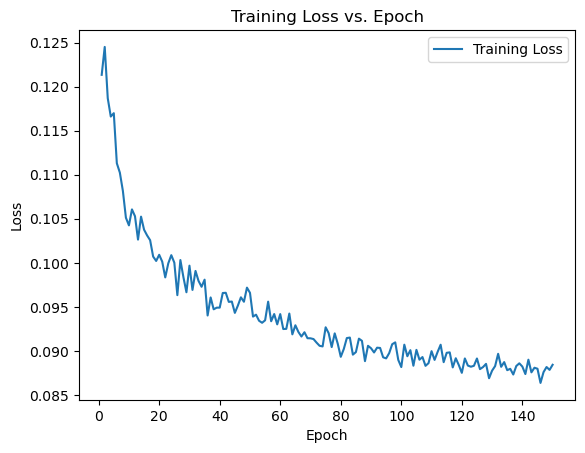

In [39]:
plt.plot(range(1, num_epochs + 1), losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epoch')
plt.legend()
plt.show()

# TESTING ON TRAINING SAMPLE

In [40]:
encoder.eval()

lr_patch = bilinear_lr_patches_tensor[6]
lr_patch_tensor = torch.tensor(lr_patch, dtype=torch.float32).unsqueeze(0).to(device)

with torch.no_grad():
  sr_patch = encoder( lr_patch_tensor)

sr_patch = sr_patch.cpu().squeeze().numpy()

lr_patch_np = lr_patch_tensor.squeeze().cpu().numpy()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14092\896921902.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  lr_patch_tensor = torch.tensor(lr_patch, dtype=torch.float32).unsqueeze(0).to(device)


In [41]:
hr_patch = hr_patches_tensor[6]
hr_patch_tensor = torch.tensor(hr_patch, dtype=torch.float32).unsqueeze(0).to(device)
hr_patch_np = hr_patch_tensor.squeeze().cpu().numpy()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14092\1955361995.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  hr_patch_tensor = torch.tensor(hr_patch, dtype=torch.float32).unsqueeze(0).to(device)


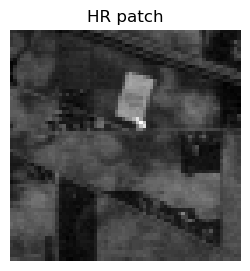

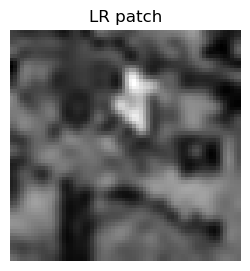

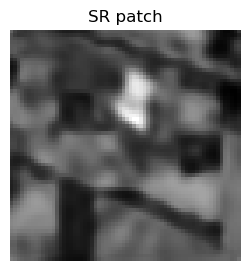

In [42]:
# Plot the HR patch
plt.figure(figsize=(3, 3))
plt.imshow(hr_patch_np[5, :, :], cmap='gray')
plt.title('HR patch')
plt.axis('off')
plt.show()

# Plot the LR patch
plt.figure(figsize=(3, 3))
plt.imshow(lr_patch_np[5,:,:], cmap='gray')
plt.title('LR patch')
plt.axis('off')
plt.show()

# Plot the SR patch
plt.figure(figsize=(3, 3))
plt.imshow(sr_patch[5,:,:], cmap='gray')
plt.title('SR patch')
plt.axis('off')
plt.show()

In [43]:
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error

def psnr_rmse_sam(image1, image2):
    # Calculate PSNR and RMSE
    psnr = peak_signal_noise_ratio(image1, image2, data_range=hr_patch_np.max())
    rmse = np.sqrt(mean_squared_error(image1, image2))

    # Flatten the images
    image1_flat = image1.reshape(-1, 200)
    image2_flat = image2.reshape(-1, 200)

    # Calculate SAM
    numerator = np.sum(image1_flat * image2_flat, axis=1)
    denominator = np.sqrt(np.sum(image1_flat ** 2, axis=1) * np.sum(image2_flat ** 2, axis=1))
    sam = np.arccos(np.clip(numerator / denominator, -1.0, 1.0)) * (180 / np.pi)  # Convert to degrees

    return psnr, rmse, np.mean(sam)


psnr_value, rmse_value, sam_value = psnr_rmse_sam(hr_patch_np, sr_patch)
print("PSNR:", psnr_value)
print("RMSE:", rmse_value)
print("SAM:", sam_value)


PSNR: 25.69442539088804
RMSE: 0.051913317385838265
SAM: 6.2476397


# TESTING ON TEST SET


In [44]:
encoder.eval()

lr_patch = test_bilinear_lr_patches_tensor[20]
lr_patch_tensor = torch.tensor(lr_patch, dtype=torch.float32).unsqueeze(0).to(device)

with torch.no_grad():
  sr_patch = encoder( lr_patch_tensor)

sr_patch = sr_patch.cpu().squeeze().numpy()

lr_patch_np = lr_patch_tensor.squeeze().cpu().numpy()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14092\3932173187.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  lr_patch_tensor = torch.tensor(lr_patch, dtype=torch.float32).unsqueeze(0).to(device)


In [45]:
hr_patch = test_hr_patches_tensor[20]
hr_patch_tensor = torch.tensor(hr_patch, dtype=torch.float32).unsqueeze(0).to(device)
hr_patch_np = hr_patch_tensor.squeeze().cpu().numpy()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14092\951927354.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  hr_patch_tensor = torch.tensor(hr_patch, dtype=torch.float32).unsqueeze(0).to(device)


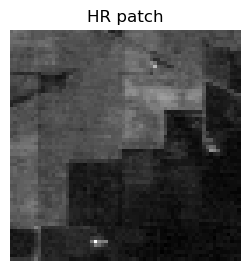

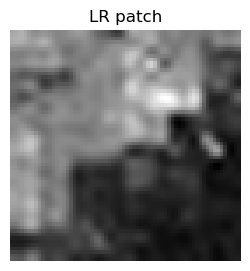

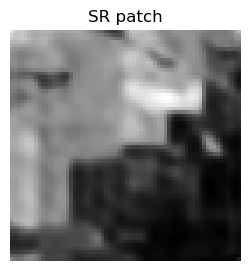

In [46]:
# Plot the HR patch
plt.figure(figsize=(3, 3))
plt.imshow(hr_patch_np[5, :, :], cmap='gray')
plt.title('HR patch')
plt.axis('off')
plt.show()

# Plot the LR patch
plt.figure(figsize=(3, 3))
plt.imshow(lr_patch_np[5,:,:], cmap='gray')
plt.title('LR patch')
plt.axis('off')
plt.show()

# Plot the SR patch
plt.figure(figsize=(3, 3))
plt.imshow(sr_patch[5,:,:], cmap='gray')
plt.title('SR patch')
plt.axis('off')
plt.show()

In [47]:
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error

def psnr_rmse_sam(image1, image2):
    # Calculate PSNR and RMSE
    psnr = peak_signal_noise_ratio(image1, image2, data_range=hr_patch_np.max())
    rmse = np.sqrt(mean_squared_error(image1, image2))

    # Flatten the images
    image1_flat = image1.reshape(-1, 200)
    image2_flat = image2.reshape(-1, 200)

    # Calculate SAM
    numerator = np.sum(image1_flat * image2_flat, axis=1)
    denominator = np.sqrt(np.sum(image1_flat ** 2, axis=1) * np.sum(image2_flat ** 2, axis=1))
    sam = np.arccos(np.clip(numerator / denominator, -1.0, 1.0)) * (180 / np.pi)  # Convert to degrees

    return psnr, rmse, np.mean(sam)


psnr_value, rmse_value, sam_value = psnr_rmse_sam(hr_patch_np, sr_patch)
print("PSNR:", psnr_value)
print("RMSE:", rmse_value)
print("SAM:", sam_value)


PSNR: 26.73675931489987
RMSE: 0.04604283262702905
SAM: 5.9974585


In [48]:
torch.save(encoder.state_dict(), 'D:\\Hemanth\\autoencoder\\saved models\\autoencoder_75per.pth')